In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/yiweichen04/retina_dataset.git

fatal: destination path 'retina_dataset' already exists and is not an empty directory.


In [ ]:
base="/content/retina_dataset"
import os
os.chdir (base)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project/df.csv")

In [ ]:
import cv2
import numpy as np
def read_img(img):
  g = img[:,:,0]
  r = img[:,:,1]
  b = img[:,:,2]
  b=cv2.addWeighted(b,4, cv2.GaussianBlur( b , (0,0) , 30) ,-4 ,128)
  g=cv2.Canny(g,30,30)
  kernel = np.array([[0, -1, 0],
                     [-1, 5,-1],
                     [0, -1, 0]])
  r = cv2.filter2D(r, ddepth=-1, kernel=kernel)
  t=cv2.merge((b,g,r))

  
  height,width, _ = t.shape
  x = int(width/2)
  y = int(height/2)
  r = np.amin((x,y))
  circle_img = np.zeros((height, width), np.uint8)
  cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
  t = cv2.bitwise_and(t, t, mask=circle_img)
  t = t[:,int((width-height)/2):int((width-height)/2)+int(height)]
  return t

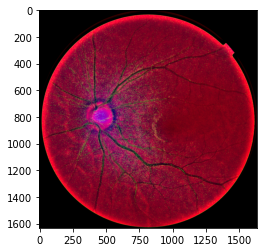

In [ ]:
t = read_img(cv2.imread("/content/retina_dataset/dataset/1_normal/NL_001.png"))
plt.imshow(t)

In [ ]:
X_img= []
X_train=list(df["path"])
import cv2
for i in X_train:
 img = cv2.imread(i)
 img = read_img(img)
 img = cv2.resize(img, (500, 500))
 X_img.append(img)

        
X_img = np.array(X_img, dtype='float64')
y = np.array(df["healthy"])
y = y.astype(int)
labels=['Not Healthy','Healthy']

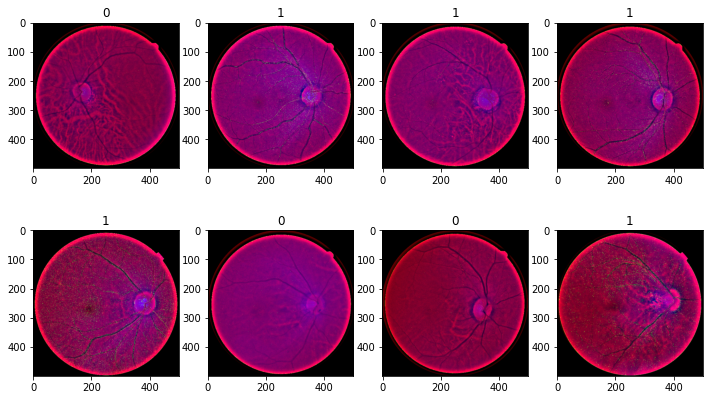

In [ ]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_img))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_img[ind]/255.)
  plt.title(y[ind])

In [ ]:
from sklearn.model_selection import train_test_split
X_img=X_img/255.
X_train, X_test, y_train, y_test = train_test_split(X_img,y, test_size=0.20)
del X_img,y

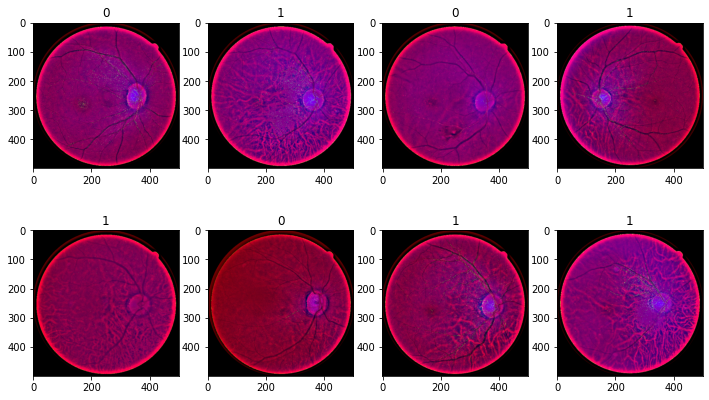

In [ ]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(y_train[ind])

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(500, 500,3)),
tf.keras.layers.Dropout(0.7),
tf.keras.layers.MaxPooling2D(4, 4),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.Dropout(0.7),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.Dropout(0.7),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),


tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.7),
tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss = 'SparseCategoricalCrossentropy',
                optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.00003),
                metrics = ['accuracy'])

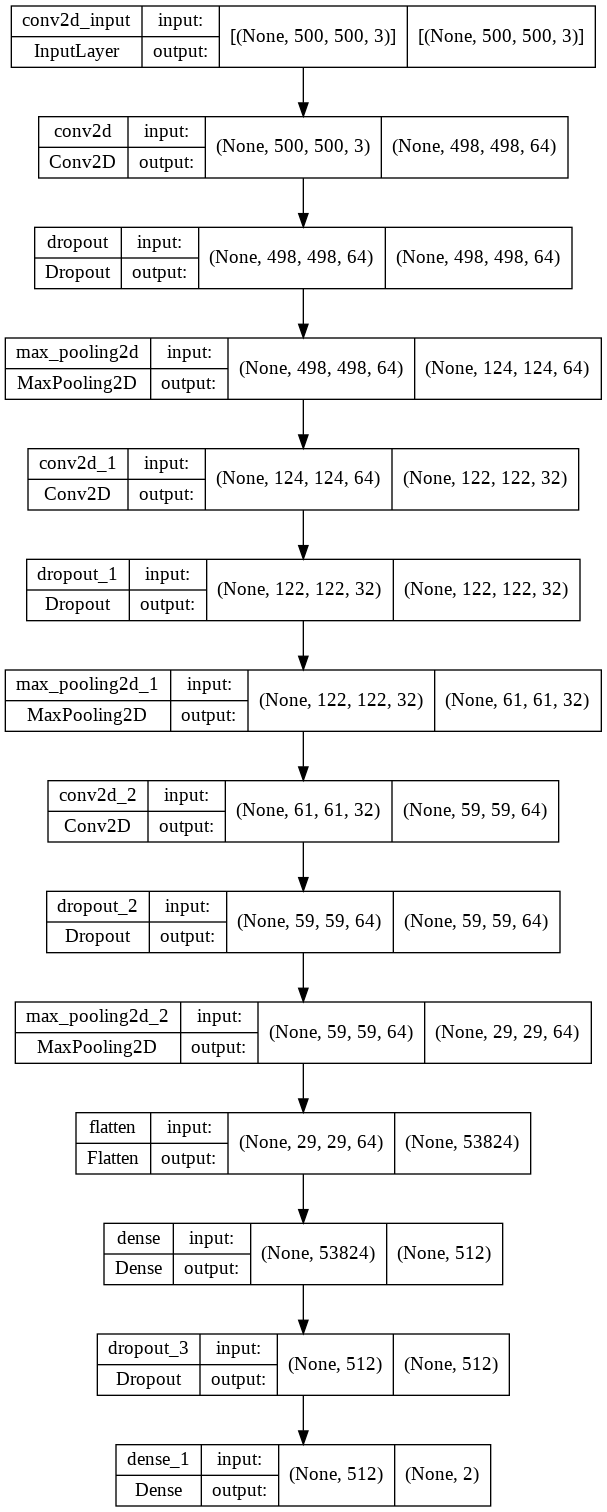

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes= True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 498, 498, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      18464     
                                                                 
 dropout_1 (Dropout)         (None, 122, 122, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                    

In [ ]:
history=model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=100)

Epoch 1/100
15/15 [==============================] - 19s 488ms/step - loss: 1.6875 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.4545
Epoch 2/100
15/15 [==============================] - 6s 404ms/step - loss: 1.2828 - accuracy: 0.5063 - val_loss: 0.6921 - val_accuracy: 0.4793
Epoch 3/100
15/15 [==============================] - 6s 404ms/step - loss: 0.9550 - accuracy: 0.5292 - val_loss: 0.6926 - val_accuracy: 0.4793
Epoch 4/100
15/15 [==============================] - 6s 405ms/step - loss: 0.8049 - accuracy: 0.5583 - val_loss: 0.6919 - val_accuracy: 0.6198
Epoch 5/100
15/15 [==============================] - 6s 404ms/step - loss: 0.7733 - accuracy: 0.5292 - val_loss: 0.6912 - val_accuracy: 0.6116
Epoch 6/100
15/15 [==============================] - 6s 407ms/step - loss: 0.7165 - accuracy: 0.5396 - val_loss: 0.6926 - val_accuracy: 0.5207
Epoch 7/100
15/15 [==============================] - 6s 403ms/step - loss: 0.7091 - accuracy: 0.5375 - val_loss: 0.6916 - val_accuracy: 0.528

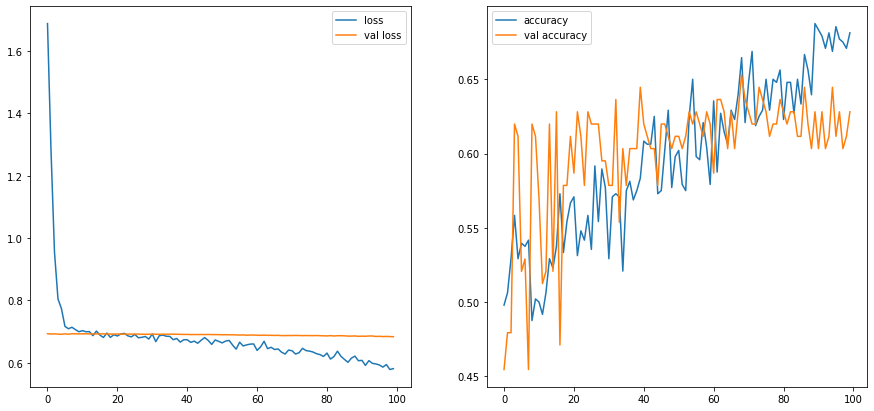

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [ ]:
model.compile(loss = 'SparseCategoricalCrossentropy',
                optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.000001),
                metrics = ['accuracy'])

In [ ]:
history=model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=20)

Epoch 1/20
15/15 [==============================] - 7s 466ms/step - loss: 0.5585 - accuracy: 0.7021 - val_loss: 0.6834 - val_accuracy: 0.6033
Epoch 2/20
15/15 [==============================] - 6s 403ms/step - loss: 0.5665 - accuracy: 0.6854 - val_loss: 0.6834 - val_accuracy: 0.6281
Epoch 3/20
15/15 [==============================] - 6s 420ms/step - loss: 0.5950 - accuracy: 0.6646 - val_loss: 0.6835 - val_accuracy: 0.6364
Epoch 4/20
15/15 [==============================] - 6s 408ms/step - loss: 0.5909 - accuracy: 0.6812 - val_loss: 0.6835 - val_accuracy: 0.6364
Epoch 5/20
15/15 [==============================] - 6s 408ms/step - loss: 0.5629 - accuracy: 0.6854 - val_loss: 0.6836 - val_accuracy: 0.6364
Epoch 6/20
15/15 [==============================] - 6s 407ms/step - loss: 0.5750 - accuracy: 0.6812 - val_loss: 0.6836 - val_accuracy: 0.6364
Epoch 7/20
15/15 [==============================] - 6s 412ms/step - loss: 0.5700 - accuracy: 0.6896 - val_loss: 0.6836 - val_accuracy: 0.6281
Epoch 

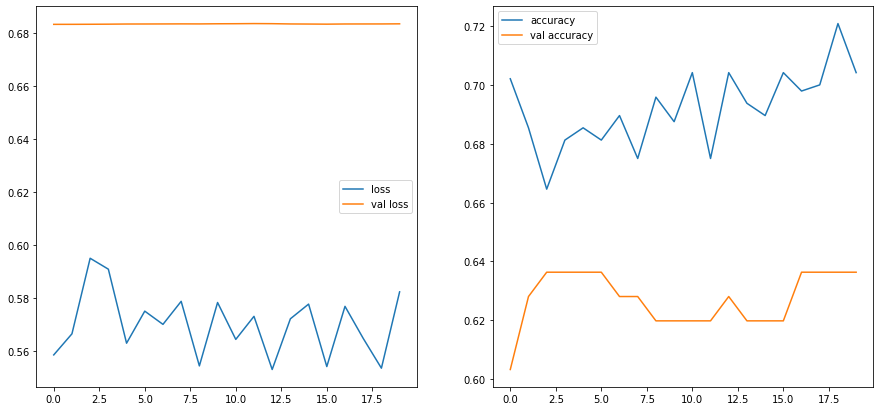

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [ ]:
model.save_weights("w.h5")

In [ ]:
model.load_weights("w.h5")

In [ ]:
model.compile(loss = 'SparseCategoricalCrossentropy',
                optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.00000003),
                metrics = ['accuracy'])

In [ ]:
history=model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=5)

Epoch 1/5
15/15 [==============================] - 19s 495ms/step - loss: 0.5899 - accuracy: 0.6917 - val_loss: 0.6736 - val_accuracy: 0.7107
Epoch 2/5
15/15 [==============================] - 6s 402ms/step - loss: 0.5954 - accuracy: 0.6917 - val_loss: 0.6737 - val_accuracy: 0.7107
Epoch 3/5
15/15 [==============================] - 6s 398ms/step - loss: 0.6152 - accuracy: 0.6583 - val_loss: 0.6737 - val_accuracy: 0.7107
Epoch 4/5
15/15 [==============================] - 6s 401ms/step - loss: 0.5840 - accuracy: 0.6854 - val_loss: 0.6737 - val_accuracy: 0.7107
Epoch 5/5
15/15 [==============================] - 6s 401ms/step - loss: 0.6023 - accuracy: 0.6562 - val_loss: 0.6737 - val_accuracy: 0.7107


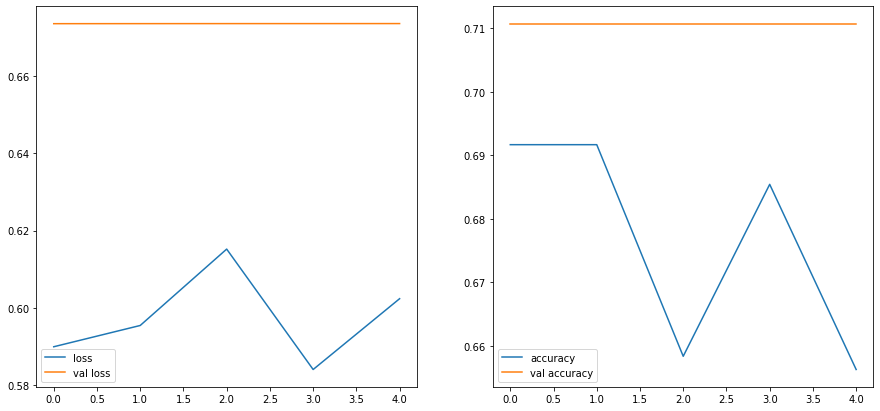

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69        72
           1       0.59      0.96      0.73        49

    accuracy                           0.71       121
   macro avg       0.77      0.75      0.71       121
weighted avg       0.80      0.71      0.71       121



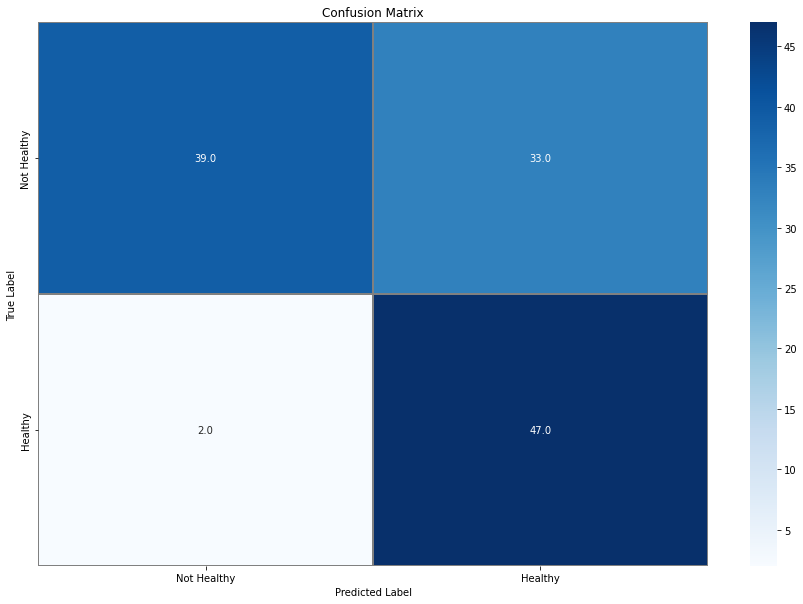

In [ ]:
confusion_mtx = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()